# Disseration Experiment 6g
# Generate DICE Output (Credit Card Fraud) - Experiment Jan 3¶
Ciaran Finnegan January 2024

# Import Libraries + Custom Functions

## Import Libraries

In [1]:
# Import libs
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import shap
import random

# Display libraries
from IPython.display import display, HTML
from prettytable import PrettyTable

# Import necessary libraries for LIME calculations
import lime
import lime.lime_tabular

# Import necessary library for ANCHOR explainer
from alibi.explainers import AnchorTabular

# Import necessary libraries for DICE explainer
import dice_ml
from dice_ml.utils import helpers  # helper functions

import raiutils
from raiutils.exceptions import UserConfigValidationException

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Libraries required for metrics calculations
from scipy.spatial import distance
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
import warnings
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample


# Classifier training (not used for explainability)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Libraries used in Experiment Creation of XL Output Metrics
import os
import time
import random
import openpyxl

## Custom Functions

Dataset Visualisations

In [2]:
%run ./DS_Visualisation_Functions.ipynb

Metrics

In [3]:
%run ./XAI_Metrics_Functions.ipynb

Function 'example_function' executed in 2.0007 seconds
Result: Result, Execution Time: 2.00071382522583 seconds


Model Evaluation Functions

In [4]:
%run ./DS_Model_Build_Evaluation_Functions.ipynb

Track Experiment Result Functions

In [5]:
%run ./XAI_Experiment_Functions.ipynb

# Data Visualisation and Exploration

## Import Data

In [6]:
#ds_file_to_load = 'credit_default_data.csv'
#df = pd.read_csv(ds_file_to_load)

In [7]:
#df.shape

## Data Exploration

### Dataset Structure

In [8]:
# Display the first few rows of the dataset to understand its structure
# This function is read from the file of custom display functions
#styled_dataframe(df.head())

In [9]:
# Reset default Pandas display options
#pd.reset_option('display.max_columns')
#pd.reset_option('display.expand_frame_repr')
#pd.reset_option('display.max_colwidth')
# Display the dataframe
#display(df.head())

### Generate Visualizations

In [10]:
# Set up the target and features to be visualised

#sTarget_feature = 'default'
#sFeature_analysis_1 = 'LIMIT_BAL'
#sFeature_analysis_2 = 'AGE'
#sFeature_analysis_3 = 'SEX'
#sFeature3_ticklabel1 = 'Male'
#sFeature3_ticklabel2 = 'Female'

#### Generate Visualizations to better understand the data distribution and relationships between features.

#### Bar and Box Plot Visualisations

In [11]:
#generate_box_plots(df, sTarget_feature, 
#                       sFeature_analysis_1, 
#                       sFeature_analysis_2, 
#                       sFeature_analysis_3,
#                       sFeature3_ticklabel1, 
#                       sFeature3_ticklabel2)

#### Heatmap Visualisation

In [12]:
# Would need feature reduction to work effectively - or some other filtering
#generate_heatmap(df, "Credit Default")

#### Distributions

In [13]:
#generate_distributions(df, 
#                       sFeature_analysis_1, 
#                       sFeature_analysis_2, 
#                       sFeature_analysis_3)

# Feature Engineering

## Check for Missing Data

In [14]:
# Determine the threshold for missing values
#threshold = 0.75 * len(df)

# Identify columns with missing values greater than the threshold
#missing_columns = df.columns[df.isnull().sum() > threshold]

# Print the columns with more than 75% missing values
#print("Columns with more than 75% missing values:", missing_columns)

# Drop columns with missing values greater than the threshold
#df = df.drop(columns=missing_columns)

# Save or continue processing with columns removed that had high volumes of missing data


In [15]:
# Display the first few rows of the dataset to re-check structure once any columns with 
# significant amounts of missing data have been removed
#df.head()

## Categorical Data 

In [16]:
# List of categorical columns
#cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [17]:
# One-hot encode categorical variables
#df_encoded = pd.get_dummies(df, columns=cat_cols)

In [18]:
#df.head()

In [19]:
# Display the first few rows of the dataset to understand its structure
#df_encoded.head()

In [20]:
# display all columns
#pd.set_option('display.max_columns', None)
#print(df_encoded)

## Downsample Majority Class

In [21]:
# Check the distribution of the target variable
#target_distribution = df_encoded['default'].value_counts()

#target_distribution

In [22]:
# Separate the majority and minority classes
#df_majority = df_encoded[df_encoded['default'] == 0]
#df_minority = df_encoded[df_encoded['default'] == 1]

In [23]:
# Downsample the majority class
#df_majority_downsampled = resample(df_majority, 
#                                   replace=False, 
#                                   n_samples=target_distribution[1], 
#                                   random_state=42)

In [24]:
# Combine the downsampled majority class with the minority class
#df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [25]:
# Shuffle the dataset to mix the data points
#df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
# Display the distribution of the target variable in the downsampled dataset
#df_downsampled['default'].value_counts()

## Split Features + Target

In [27]:
# Splitting the features and target variable
#X = df_downsampled.drop('default', axis=1)
#y = df_downsampled['default']

## Split Data into Test/Training Datasets

In [28]:
# Splitting the data into training and testing sets
#X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(
#    X, y, test_size=0.2, random_state=42)

In [29]:
# Reset Indexes
#X_train_downsampled = X_train_downsampled.reset_index(drop=True)
#X_test_downsampled = X_test_downsampled.reset_index(drop=True)

#y_train_downsampled = y_train_downsampled.reset_index(drop=True)
#y_test_downsampled = y_test_downsampled.reset_index(drop=True)

## Scale The Features

In [30]:
#X_train_downsampled, X_test_downsampled = scale_the_features(X_train_downsampled, X_test_downsampled, df_downsampled)

## Basic Additional Data Exploration (Training Data)

In [31]:
# Train model Stats
#print("Number of Features:", X_train_downsampled.shape[1])
#print("Number Continuous Features:", X_train_downsampled.shape[1] - len(cat_cols))
#print("Number Categorical Features:", len(cat_cols))
#print("Number Train Examples:", X_train_downsampled.shape[0])
#print("Number Positive Train Examples:", (y_train_downsampled == 1).sum())
#print("Number Negative Train Examples:", (y_train_downsampled == 0).sum())

# Build Model

## Set Up Hyperparameters

In [32]:
# Building the ANN model using TensorFlow/Keras
#model = keras.Sequential([
#    layers.Dense(32, activation='relu', input_shape=(X_train_downsampled.shape[1],)),
#    layers.Dense(16, activation='relu'),
#    layers.Dense(1, activation='sigmoid')
#])

In [33]:
#model.compile(optimizer='adam', 
#              loss='binary_crossentropy', 
#              metrics=['accuracy'])

## Build Neural Network (w/TensorFlow/Keras)

In [34]:
#model.fit(X_train_downsampled, 
#          y_train_downsampled, 
#          epochs=15, 
#          batch_size=32, 
#          validation_split=0.2)

# Evaluate Model

## Assess and Display Model Peformance

### Tabular Data

In [35]:
#y_pred = display_model_metrics_tabular(model, X_test_downsampled, y_test_downsampled)

### Confusion Matrix

In [36]:
#generate_confusion_matrix(y_test_downsampled, y_pred)

## Additional Model Validation

In [37]:
loaded_model = keras.models.load_model('ccfraud_model')  # If saved as SavedModel

In [38]:
X_test_loaded, y_test_loaded, df_downsampled_loaded, dfCatCols = load_CC_train_test_data()

In [39]:
dfCatCols

,0
0,PosTerminalAttended
1,TxnChannelCode
2,CustomerPresentIndicator
3,DvcPosEntryMode
4,ECommerceFlag


In [40]:
y_pred_loaded = display_model_metrics_tabular(loaded_model, X_test_loaded, y_test_loaded)

42/42 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8516


42/42 [==============================] - 0s 955us/step


Metric,Value
Accuracy,0.851598
ROC AUC Score,0.938324
Precision (Class 0),0.836442
Recall (Class 0),0.878012
F1-Score (Class 0),0.856723
Precision (Class 1),0.868720
Recall (Class 1),0.824615
F1-Score (Class 1),0.846093


Tablular Done!


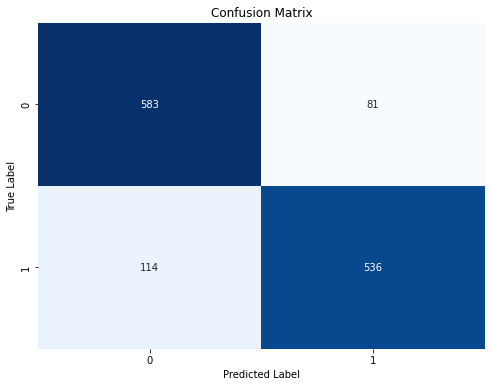

'Confusion Matrix!'

In [41]:
generate_confusion_matrix(y_test_loaded, y_pred_loaded)

# Apply DiCE

## Generate the Counterfactuals

### Use Tensor Flow - Prepare DiCE parameters

In [42]:
lCC_catcols_as_list = dfCatCols[dfCatCols.columns[0]].tolist()

In [43]:
lCC_catcols_as_list

['PosTerminalAttended',
 'TxnChannelCode',
 'CustomerPresentIndicator',
 'DvcPosEntryMode',
 'ECommerceFlag']

In [44]:
# Using TensorFlow backend for DiCE
continuous_features_list = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [45]:
continuous_features_list

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [46]:
#df_encoded

In [47]:
# Using TensorFlow backend for DiCE
# IS THE BELOW CORRECT? SHOULD THE 'd' VALUE BE GENERATED BASED ON THE SCALED DATA USED TO BUILD THE MODEL?
# d = dice_ml.Data(dataframe=df_encoded, continuous_features=continuous_features_list, outcome_name='default')

# Dec 29 - use df_downsampled instead of df_encoded
# d = dice_ml.Data(dataframe=df_downsampled, continuous_features=continuous_features_list, outcome_name='default')
# m = dice_ml.Model(model=model, backend="TF2")

### Use Tensor Flow - Prepare DiCE parameters - CC Dataset

In [48]:
df_downsampled_loaded

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,-1,0,1,5631,0,0,1,1,1,1,...,1,0,0,0,1,1,0,0,1,0
1,-1,0,3,5499,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
2,-1,0,3,5943,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
3,-2,0,2,5499,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,-1,0,1,7011,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,-1,0,1,5968,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
6566,-13,0,13,7311,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
6567,1,1,0,8099,1,1,1,1,1,1,...,0,1,0,0,1,0,0,1,1,0
6568,1,0,1,5812,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0


In [49]:
# Dec 30 - using loaded model and CC dataset and categotical columns

# Assuming 'df_downsampled_loaded' is your DataFrame and 'Fraud' is the target variable
feature_names = [col for col in df_downsampled_loaded.columns if col != 'Fraud']  # Exclude the target variable

In [50]:
feature_names

['OnlinePOSCount.cnt.day.present',
 'EMVTransactionsCount.cnt.day.present',
 'NonEMVTransactionsCount.cnt.day.present',
 'MerchantCategory',
 'POS_Count.cnt.day.present',
 'PinIndicator',
 'DomesticAuthCount.cnt.hour1',
 'DomesticAuthCount.cnt.hour3',
 'DomesticAuthCount.cnt.hour4',
 'DomesticAuthCount.cnt.hour10',
 'DomesticAuthCount.cnt.hour15',
 'DomesticAuthCounter.cnt.day.present',
 'DomesticAuthCount.cnt.hour25',
 'OnlinePOSCountForever.cnt.present',
 'POSTerminalAttendedAuthCount.cnt.day.present',
 'CustomerNotPresentAuthCount.cnt.day.present',
 'DvcVerificationCap',
 'ECommerceAuthCount.cnt.day.present',
 'OnlineNewMerchCtryCntDaily.cnt.day.present',
 'OnlineNewMerchCtryCntHourly.cnt.hour24',
 'OnlineNewMerchCtryCntHourly.cnt.hour15',
 'OnlineNewMerchCtryCntHourly.cnt.hour10',
 'OnlineNewMerchCtryCntHourly.cnt.hour3',
 'OnlineNewMerchCtryCntHourly.cnt.hour4',
 'OnlineNewMerchCtryCntDaily.cnt.day.total',
 'NotECommerceAuthCount.cnt.day.present',
 'NewMerchantCountryCount.cnt.hou

In [51]:
def is_continuous(col_name):
    """
    Determine if the feature should be considered continuous based on its column name.
    Exclude any feature with an underscore or the word 'hour' in its name.

    Parameters:
    col_name (str): The name of the column/feature.

    Returns:
    bool: True if the feature is considered continuous, False otherwise.
    """
    return '_' not in col_name and 'hour' not in col_name.lower() and 'merchant' not in col_name.lower() # Check for underscore and word 'hour'

In [52]:
# Assuming 'df_downsampled_loaded' is your DataFrame and 'Fraud' is the target variable
continuous_features = [col for col in df_downsampled_loaded.columns if col != 'Fraud' and is_continuous(col)]  
# Replace is_continuous with your method or criteria for determining if a column is continuous

In [53]:
continuous_features

['OnlinePOSCount.cnt.day.present',
 'EMVTransactionsCount.cnt.day.present',
 'NonEMVTransactionsCount.cnt.day.present',
 'PinIndicator',
 'DomesticAuthCounter.cnt.day.present',
 'OnlinePOSCountForever.cnt.present',
 'POSTerminalAttendedAuthCount.cnt.day.present',
 'CustomerNotPresentAuthCount.cnt.day.present',
 'DvcVerificationCap',
 'ECommerceAuthCount.cnt.day.present',
 'OnlineNewMerchCtryCntDaily.cnt.day.present',
 'OnlineNewMerchCtryCntDaily.cnt.day.total',
 'NotECommerceAuthCount.cnt.day.present',
 'AuthResponse',
 'AmountBase',
 'CardType',
 'POSSum.acc.month.total',
 'NotECommerceAuthAmount.acc.day.total',
 'NonEMVTransactionsAcc.acc.day.total',
 'POSTerminalAttendedAuthAmount.acc.day.total',
 'CustomerPresentAuthAmount.acc.day.total',
 'EMVTransactionsAcc.acc.day.total',
 'CustomerNotPresentAuthAmount.acc.day.total',
 'NonEMVTransactionsAcc.acc.day.present',
 'NotECommerceAuthAmount.acc.day.present',
 'CustomerNotPresentAuthAmount.acc.day.present',
 'POSTerminalAttendedAuthAmou

In [54]:
# Using TensorFlow backend for DiCE
#cc_continuous_features_list = ['OnlinePOSCount.cnt.day.present', 'EMVTransactionsCount.cnt.day.present', 
#                               'NonEMVTransactionsCount.cnt.day.present', 'MerchantCategory', 'AmountBase', 'CardType']
#cc_continuous_features_list = ['CustomerNotPresentAuthCount.cnt.day.present','DvcVerificationCap', 'AmountBase']
#cc_continuous_features_list = ['DvcVerificationCap']

In [55]:
def read_cc_features(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)
    
    # Filter the data where Rank is 39 or between 41 and 53 (inclusive)
    filtered_data = data[(data['RANK'] == 39) | ((data['RANK'] >= 41) & (data['RANK'] <= 55))]
    
    # Extract the 'Feature' column values and return them as a list
    feature_list = filtered_data['FEATURE'].tolist()
    return feature_list

In [56]:
# Usage:
# Assuming the file is in the same directory or provide the full path
file_path = 'Select_CC_Fraud_Features_v1_1.csv'
cc_continuous_features_list = read_cc_features(file_path)

In [57]:
cc_continuous_features_list

['AmountBase',
 'POSSum.acc.month.total',
 'NotECommerceAuthAmount.acc.day.total',
 'NonEMVTransactionsAcc.acc.day.total',
 'POSTerminalAttendedAuthAmount.acc.day.total',
 'CustomerPresentAuthAmount.acc.day.total',
 'EMVTransactionsAcc.acc.day.total',
 'CustomerNotPresentAuthAmount.acc.day.total',
 'HourlyAuthAmt.acc.hour25',
 'NonEMVTransactionsAcc.acc.day.present',
 'NotECommerceAuthAmount.acc.day.present',
 'CustomerNotPresentAuthAmount.acc.day.present',
 'POSTerminalAttendedAuthAmount.acc.day.present',
 'CustomerPresentAuthAmount.acc.day.present',
 'HighRiskPOSSum.acc.hour.total',
 'EMVTransactionsAcc.acc.day.present']

In [58]:
# Define the data for DiCE based on your DataFrame
#d = dice_ml.Data(dataframe=df_downsampled_loaded, continuous_features=feature_names, outcome_name='Fraud')
#d = dice_ml.Data(dataframe=df_downsampled_loaded, continuous_features=continuous_features, outcome_name='Fraud')
d = dice_ml.Data(dataframe=df_downsampled_loaded, continuous_features=cc_continuous_features_list, outcome_name='Fraud')

In [59]:
# Use the backend as TensorFlow and link the model
m = dice_ml.Model(model=loaded_model, backend='TF2')

In [60]:
# Initialize DiCE
exp = dice_ml.Dice(d, m)

In [61]:
# Generate counterfactual explanations
# Change query instances to match the instances you are interested in
#query_instance = df_downsampled.iloc[0:1].drop('default', axis=1)
query_instances = df_downsampled_loaded.iloc[0:2].drop('Fraud', axis=1)  # Taking the first two instances
counterfactuals = exp.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite")

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


In [62]:
# Visualize the counterfactual explanations
counterfactuals.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 0)


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,0



Diverse Counterfactual set (new outcome: 1)


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
3,7,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1


Query instance (original outcome : 0)


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,-1,0,3,5499,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0



Diverse Counterfactual set (new outcome: 1)


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1


------------------------

In [63]:
#df_encoded.head()
#df_downsampled.head()
df_downsampled_loaded.head()

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,-1,0,1,5631,0,0,1,1,1,1,...,1,0,0,0,1,1,0,0,1,0
1,-1,0,3,5499,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
2,-1,0,3,5943,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
3,-2,0,2,5499,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,-1,0,1,7011,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,1,0


In [64]:
#df_encoded['default']
#df_downsampled['default']
df_downsampled_loaded['Fraud']

0       1
1       1
2       0
3       1
4       0
       ..
6565    1
6566    1
6567    1
6568    1
6569    0
Name: Fraud, Length: 6570, dtype: int64

#### Generate Single Set of Counterfatuals

In [65]:
# Generate counterfactuals
exp = dice_ml.Dice(d, m)

# Dec 29 - use df_downsampled instead of df_encoded
#query_instance = df_encoded.iloc[0:1].drop('default', axis=1)
#query_instance = df_downsampled.iloc[0:1].drop('default', axis=1)
query_instance = df_downsampled_loaded.iloc[0:1].drop('Fraud', axis=1)

In [66]:
# Generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=5, desired_class="opposite")

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


#### Visualize Counterfactuals (Single Set)

In [67]:
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,0



Diverse Counterfactual set (new outcome: 1)


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
1,-1,0,1,5631,29,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
2,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,-1,0,1,7995,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
4,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1


#### Identify Counterfactual Differences (Single Set)

##### Create Display Function

In [68]:
def highlight_differences(query_instance, counterfactuals_df):
    """
    Compares a query instance (as a Series) with counterfactual instances in a DataFrame.
    
    Args:
    - query_instance (pd.Series): The original data instance.
    - counterfactuals_df (pd.DataFrame): DataFrame containing counterfactual instances.
    
    Returns:
    - A styled DataFrame where:
        * The original instance is highlighted entirely.
        * Cells with differences in counterfactuals are highlighted.
    """
    # Convert query_instance to DataFrame and concatenate with counterfactuals_df
    combined_df = pd.concat([query_instance.to_frame().T, counterfactuals_df], axis=0).reset_index(drop=True)
    
    def highlight_cells(row):
        """Helper function to apply the styling."""
        if row.name == 0:  # If it's the original instance
            return ['background-color: lightblue' for _ in row.index]
        
        # For counterfactual rows
        colors = []
        for col in row.index:
            original_value = query_instance[col]
            cf_value = row[col]
            
            # Convert to the same data type if they are different
            if type(original_value) != type(cf_value):
                try:
                    original_value = type(cf_value)(original_value)
                except ValueError:
                    try:
                        cf_value = type(original_value)(cf_value)
                    except ValueError:
                        pass
            
            # Handle float comparisons with a small tolerance
            if isinstance(original_value, float) and isinstance(cf_value, float):
                if abs(original_value - cf_value) < 1e-9:
                    colors.append('')
                else:
                    colors.append('background-color: yellow')
            elif original_value != cf_value:
                colors.append('background-color: yellow')
            else:
                colors.append('')
        return colors
    
    styled_df = combined_df.style.apply(highlight_cells, axis=1)
    return styled_df

# This refined version of the function should handle potential data type mismatches better.

##### Display Differences

In [69]:
# 2. Extract counterfactuals to a DataFrame
your_actual_counterfactuals_df = dice_exp.cf_examples_list[0].final_cfs_df

In [70]:
your_actual_counterfactuals_df.head()

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
1,-1,0,1,5631,29,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
2,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,-1,0,1,7995,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1
4,-1,0,1,5631,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,1


In [71]:
# Dec 29 - use df_downsampled instead of df_encoded
# query_instance_series = df_encoded.iloc[0]
# query_instance_series = df_downsampled.iloc[0]
query_instance_series = df_downsampled_loaded.iloc[0]

In [72]:
styled_result = highlight_differences(query_instance_series, your_actual_counterfactuals_df)

In [73]:
# 3. Visualize differences
display(styled_result)

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,DomesticAuthCount.cnt.hour15,DomesticAuthCounter.cnt.day.present,DomesticAuthCount.cnt.hour25,OnlinePOSCountForever.cnt.present,POSTerminalAttendedAuthCount.cnt.day.present,CustomerNotPresentAuthCount.cnt.day.present,DvcVerificationCap,ECommerceAuthCount.cnt.day.present,OnlineNewMerchCtryCntDaily.cnt.day.present,OnlineNewMerchCtryCntHourly.cnt.hour24,OnlineNewMerchCtryCntHourly.cnt.hour15,OnlineNewMerchCtryCntHourly.cnt.hour10,OnlineNewMerchCtryCntHourly.cnt.hour3,OnlineNewMerchCtryCntHourly.cnt.hour4,OnlineNewMerchCtryCntDaily.cnt.day.total,NotECommerceAuthCount.cnt.day.present,NewMerchantCountryCount.cnt.hour15,OnlineNewMerchCtryCntHourly.cnt.hour1,NewMerchantCountryCount.cnt.hour10,NewMerchantCountryCount.cnt.hour24,NewMerchantCountryCount.cnt.hour4,NewMerchantCountryCount.cnt.hour3,AuthResponse,NewMerchantCountryCount.cnt.hour1,AmountBase,CardType,POSSum.acc.month.total,NotECommerceAuthAmount.acc.day.total,NonEMVTransactionsAcc.acc.day.total,POSTerminalAttendedAuthAmount.acc.day.total,CustomerPresentAuthAmount.acc.day.total,EMVTransactionsAcc.acc.day.total,CustomerNotPresentAuthAmount.acc.day.total,HourlyAuthAmt.acc.hour25,NonEMVTransactionsAcc.acc.day.present,NotECommerceAuthAmount.acc.day.present,CustomerNotPresentAuthAmount.acc.day.present,POSTerminalAttendedAuthAmount.acc.day.present,CustomerPresentAuthAmount.acc.day.present,HighRiskPOSSum.acc.hour.total,EMVTransactionsAcc.acc.day.present,Fraud,PosTerminalAttended_N,PosTerminalAttended_U,PosTerminalAttended_Y,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,-1,0,1,5631,0,0,1,1,1,1,1,1,1,-19,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,203,819,2300,14880,20450,13948,7355,0,13095,203,203,203,0,203,203,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0
1,-1,0,1,5631,0,0,1,1,1,1,1,1,1,-19,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,203,819,2300,14880,20450,13948,7355,0,13095,203,17213,203,0,203,203,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0
2,-1,0,1,5631,29,0,1,1,1,1,1,1,1,-19,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,203,819,2300,14880,37813,13948,7355,0,13095,203,203,203,0,203,203,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0
3,-1,0,1,5631,0,0,1,1,1,1,1,1,1,-19,1,0,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,203,819,2300,14880,20450,3227,7355,0,13095,203,203,203,0,203,203,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0
4,-1,0,1,7995,0,0,1,1,1,1,1,1,1,-19,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,203,819,2300,14880,20450,13948,7355,0,13095,203,20369,203,0,203,203,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0
5,-1,0,1,5631,0,0,1,1,1,1,1,1,1,-19,1,0,1,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,203,819,2300,14880,55204,13948,7355,0,13095,203,203,203,0,203,203,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0


# Prepare Data for Metric Calculations

### Prepare DiCE input to Metrics function

In [74]:
@timeit
def generate_counterfactuals_for_instances(df, num_instances=20, sLabel='Fraud'):
    """
    Generate counterfactual explanations for a specified number of instances from a dataframe.
    
    Args:
    - df (pd.DataFrame): The dataframe containing the original instances.
    - num_instances (int): The number of instances for which to generate counterfactuals.
    
    Returns:
    - original_instances_df (pd.DataFrame): DataFrame containing the original instances.
    - counterfactuals_df (pd.DataFrame): DataFrame containing the counterfactual explanations.
    """
    # Prepare an empty dataframe for counterfactuals
    counterfactuals_list = []
    
    # Select the first 'num_instances' from the dataframe
    original_instances_df = df.head(num_instances)
    
    for _, instance in original_instances_df.iterrows():
        # Convert the instance to DataFrame
        
        instance_df = instance.drop(sLabel).to_frame().T
        #instance_df = instance.drop('default').to_frame().T
        #instance_df = instance.to_frame().T
        
        # Generate counterfactual for the instance
        dice_exp = exp.generate_counterfactuals(instance_df, total_CFs=1, desired_class="opposite")
        
        # Extract the counterfactual to a DataFrame
        cf_df = dice_exp.cf_examples_list[0].final_cfs_df.drop(sLabel, axis=1)
        #cf_df = dice_exp.cf_examples_list[0].final_cfs_df.drop('default', axis=1)
        #cf_df = dice_exp.cf_examples_list[0].final_cfs_df
        
        # Append the counterfactual to the list
        counterfactuals_list.append(cf_df.iloc[0])
    
    counterfactuals_df = pd.DataFrame(counterfactuals_list).reset_index(drop=True)
    
    return original_instances_df, counterfactuals_df

In [75]:
# Dec 29 - use df_downsampled instead of df_encoded
# df_encoded
#df_downsampled
df_downsampled_loaded

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,-1,0,1,5631,0,0,1,1,1,1,...,1,0,0,0,1,1,0,0,1,0
1,-1,0,3,5499,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
2,-1,0,3,5943,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
3,-2,0,2,5499,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,-1,0,1,7011,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,-1,0,1,5968,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
6566,-13,0,13,7311,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
6567,1,1,0,8099,1,1,1,1,1,1,...,0,1,0,0,1,0,0,1,1,0
6568,1,0,1,5812,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0


In [76]:
# Extract the feature names, excluding the target variable 'default'
#column_names = df_downsampled.drop('default', axis=1).columns
column_names = df_downsampled_loaded.drop('Fraud', axis=1).columns

In [77]:
# Convert NumPy array to DataFrame
#X_test_downsampled = pd.DataFrame(X_test_downsampled, columns=column_names)
#X_test_loaded= pd.DataFrame(X_test_loaded, columns=column_names)

In [78]:
#X_test_downsampled.head()
X_test_loaded.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.320699,-0.509829,-0.307255,-0.396075,-0.046062,-0.546865,-0.098660,-0.183250,-0.208505,-0.278950,...,-1.159004,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629
1,0.040094,-0.509829,-0.307255,-0.436768,-0.513444,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
2,-0.240511,-0.509829,-0.005934,-1.102385,-0.513444,-0.546865,0.567008,0.325015,0.758327,0.550092,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
3,0.881908,-0.509829,0.295388,-0.131572,1.823463,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,-1.159004,1.159004,-0.893738,2.456857,-0.840202,1.231764,-0.858790,-0.465777,0.833629,-0.833629
4,0.601303,2.938901,-0.457916,1.240355,0.888700,1.828606,1.232675,0.833281,0.758327,0.550092,...,-1.159004,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629


In [79]:
#X_test_downsampled['default']

In [80]:
# Execute the function for the first 20 instances of 'df_encoded'
#results, exec_time = generate_counterfactuals_for_instances(df_encoded)

# Dec 29 - use df_downsampled instead of df_encoded
#results, exec_time = generate_counterfactuals_for_instances(df_downsampled)
results, exec_time = generate_counterfactuals_for_instances(df_downsampled_loaded)


# Execute the function for the first 20 instances of the training data
#results, exec_time = generate_counterfactuals_for_instances(X_test_downsampled)

100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

Function 'generate_counterfactuals_for_instances' executed in 22.1677 seconds


In [81]:
# Unpack the results to get df_instances and df_shap_values
#df_instances, df_shap_values = results
original_df, cf_df = results

### Determine Computational Efficiency Value

In [82]:
# Display time to generate DiCE explainers
print(f"Dice Execution Time: {exec_time} seconds")

Dice Execution Time: 22.16774559020996 seconds


In [83]:
original_df

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,-1,0,1,5631,0,0,1,1,1,1,...,1,0,0,0,1,1,0,0,1,0
1,-1,0,3,5499,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
2,-1,0,3,5943,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
3,-2,0,2,5499,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,-1,0,1,7011,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,1,0
5,1,0,1,5812,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
6,5,0,7,5912,6,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
7,1,0,1,5411,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
8,-9,0,9,4814,0,0,9,9,9,9,...,1,0,1,0,0,0,1,0,0,1
9,-5,0,5,4722,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [84]:
cf_df

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,-1,0,1,5631,0,0,1,1,1,1,...,1,0,0,0,1,1,0,0,1,0
1,-1,0,3,5499,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
2,-1,0,3,5943,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
3,-2,0,2,5499,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,-1,0,1,7011,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,1,0
5,1,0,1,5812,1,0,1,17,1,1,...,0,1,0,0,1,1,0,0,1,0
6,5,0,7,5912,6,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
7,1,0,1,5411,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0
8,-9,0,9,4814,0,0,9,9,9,9,...,1,0,1,0,0,0,1,0,0,1
9,-5,0,5,4722,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


# Generate XAI Metrics 

## Identity

#### Run a Basic Test First

In [85]:
scaler = StandardScaler()

In [86]:
original_df = scaler.fit_transform(original_df)

In [87]:
cf_df = scaler.fit_transform(cf_df)

In [88]:
# Extract the feature names, excluding the target variable 'Fraud'
#column_names_wDefault = df_downsampled.columns
column_names_wDefault = df_downsampled_loaded.columns

In [89]:
# Convert NumPy array to DataFrame
original_df = pd.DataFrame(original_df, columns=column_names_wDefault)

In [90]:
# Convert NumPy array to DataFrame
cf_df = pd.DataFrame(cf_df, columns=column_names)

In [91]:
original_df.head()

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,-0.252227,-0.420084,-0.652234,-0.019803,-0.711388,-0.420084,-0.126796,-0.126796,-0.220963,-0.237023,...,1.105542,-1.105542,-0.654654,-0.577350,1.105542,0.904534,-0.654654,-0.420084,0.654654,-0.654654
1,-0.252227,-0.420084,0.189358,-0.184723,-0.142278,-0.420084,-0.633979,-0.633979,-0.220963,-0.237023,...,1.105542,-1.105542,1.527525,-0.577350,-0.904534,-1.105542,1.527525,-0.420084,-1.527525,1.527525
2,-0.252227,-0.420084,0.189358,0.370008,-0.142278,-0.420084,-0.126796,-0.126796,-0.220963,-0.237023,...,-0.904534,0.904534,-0.654654,-0.577350,1.105542,0.904534,-0.654654,-0.420084,0.654654,-0.654654
3,-0.567510,-0.420084,-0.231438,-0.184723,-0.711388,-0.420084,-0.633979,-0.633979,-0.711991,-0.711068,...,1.105542,-1.105542,1.527525,-0.577350,-0.904534,-1.105542,1.527525,-0.420084,-1.527525,1.527525
4,-0.252227,-0.420084,-0.652234,1.704360,-0.711388,-0.420084,-0.126796,-0.126796,-0.220963,-0.237023,...,1.105542,-1.105542,-0.654654,1.732051,-0.904534,0.904534,-0.654654,-0.420084,0.654654,-0.654654


In [92]:
cf_df.head()

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,0.065816,-0.420084,-0.652234,-0.019803,-0.711388,-0.420084,-0.126796,-0.340614,-0.220963,-0.237023,...,1.105542,-1.224745,-0.654654,-0.577350,1.105542,0.904534,-0.654654,-0.5,0.654654,-0.654654
1,0.065816,-0.420084,0.189358,-0.184723,-0.142278,-0.420084,-0.633979,-0.540975,-0.220963,-0.237023,...,1.105542,-1.224745,1.527525,-0.577350,-0.904534,-1.105542,1.527525,-0.5,-1.527525,1.527525
2,0.065816,-0.420084,0.189358,0.370008,-0.142278,-0.420084,-0.126796,-0.340614,-0.220963,-0.237023,...,-0.904534,0.816497,-0.654654,-0.577350,1.105542,0.904534,-0.654654,-0.5,0.654654,-0.654654
3,-0.080442,-0.420084,-0.231438,-0.184723,-0.711388,-0.420084,-0.633979,-0.540975,-0.711991,-0.711068,...,1.105542,-1.224745,1.527525,-0.577350,-0.904534,-1.105542,1.527525,-0.5,-1.527525,1.527525
4,0.065816,-0.420084,-0.652234,1.704360,-0.711388,-0.420084,-0.126796,-0.340614,-0.220963,-0.237023,...,1.105542,-1.224745,-0.654654,1.732051,-0.904534,0.904534,-0.654654,-0.5,0.654654,-0.654654


In [93]:
# Select two random instances from the DiCE dataframe
df_xai_numerical = cf_df

random_indices = np.random.choice(df_xai_numerical.index, size=2, replace=False)
instance_1 = df_xai_numerical.iloc[random_indices[0]]
instance_2 = df_xai_numerical.iloc[random_indices[1]]

# Compute the Euclidean distance between the selected instances - uses custom project function
distance = get_euclidean_distance(instance_1, instance_2)
print(f"Euclidean distance between instance {random_indices[0]} and instance {random_indices[1]}: {distance:.4f}")


Calculating Euclidean distance...


Euclidean distance between instance 7 and instance 18: 7.1844


#### Retrieve Identity Score

In [94]:
# Convert all values to float for consistent data type
original_df = original_df.astype(float)
cf_df = cf_df.astype(float)

In [95]:
from scipy.spatial import distance

In [96]:
DiCE_Identity_Metric = get_identity_metric(original_df, cf_df, "DiCE")

Instance 0:   Current matches: 1
	Closest feature instance: 5 (Distance: 7.6645)
	Closest DiCE instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 1:   Current matches: 2
	Closest feature instance: 3 (Distance: 2.1202)
	Closest DiCE instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 2:   Current matches: 3
	Closest feature instance: 7 (Distance: 3.9181)
	Closest DiCE instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 3:   Current matches: 4
	Closest feature instance: 1 (Distance: 2.1202)
	Closest DiCE instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 4:   Current matches: 4
	Closest feature instance: 10 (Distance: 4.0532)
	Closest DiCE instance: {closest_xai_idx} (Distance: {xai_distances[closest_xai_idx]:.4f})
Instance 5:   Current matches: 4
	Closest feature instance: 7 (Distance: 2.9747)
	Closest DiCE instance: {closest_xai_idx} (Distance: {xai_

#### Display Identity Score Metric

In [97]:
DiCE_Ident_Number = "{:.2f}%".format(DiCE_Identity_Metric)

In [98]:
display_text("DiCE Identity Metric Score: " + DiCE_Ident_Number)

## Stability

### Invoke Stability Metric Function

#### Retrieve Stability Score

In [99]:
#DiCE_Stability_Metric = get_stability_metric_y(cf_df, y_test_downsampled, 'DiCE')
DiCE_Stability_Metric = get_stability_metric_y(cf_df, y_test_loaded, 'DiCE')

Number of Instances in Cluster '0': 0
Number of Instances in Cluster '1': 0

For Class '0':
Total Instances: 9
Matching Cluster '0' Instances: 0

For Class '1':
Total Instances: 11
Matching Cluster '1' Instances: 0


This is the function in XAI_METRICS_FUNCTIONS -- STABILITY -- DiCE



Percentage of matches: 0.00%   0.0 Matches of 20 Entries


#### Display Stability Score Metric

In [100]:
DiCE_Stbly_Number = "{:.2f}%".format(DiCE_Stability_Metric)

In [101]:
display_text("DiCE Stability Metric Score: " + DiCE_Stbly_Number)

## Seperability

### Invoke Seperability Metric Function

#### Retrieve Seperability Score

In [102]:
DiCE_Seperability_Metric = get_seperability_metric(original_df, cf_df, "DiCE")

In [103]:
DiCE_Seperability_Number = "{:.2f}%".format(DiCE_Seperability_Metric)

In [104]:
display_text("DiCE Seperability Metric Score: " + DiCE_Seperability_Number)

## Similarity

### Invoke Similarity Metric Function

#### Retrieve Similarity Score

In [105]:
DiCE_Similarity_Metric = get_similarity_metric(original_df, cf_df, "DiCE", use_dbscan=False)

In [106]:
DiCE_Similarity_Number = "{:6.2f}".format(DiCE_Similarity_Metric)

In [107]:
display_text("DiCE Similarity Metric Value: " + DiCE_Similarity_Number)

# XAI Experiments - Metrics Capture

## Suppress Warnings to clean up output

In [108]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Break out Model Test Data into a list of dataframes

### Create Test Data for Experiment Inout

In [109]:
X_test_loaded.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.320699,-0.509829,-0.307255,-0.396075,-0.046062,-0.546865,-0.098660,-0.183250,-0.208505,-0.278950,...,-1.159004,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629
1,0.040094,-0.509829,-0.307255,-0.436768,-0.513444,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
2,-0.240511,-0.509829,-0.005934,-1.102385,-0.513444,-0.546865,0.567008,0.325015,0.758327,0.550092,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
3,0.881908,-0.509829,0.295388,-0.131572,1.823463,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,-1.159004,1.159004,-0.893738,2.456857,-0.840202,1.231764,-0.858790,-0.465777,0.833629,-0.833629
4,0.601303,2.938901,-0.457916,1.240355,0.888700,1.828606,1.232675,0.833281,0.758327,0.550092,...,-1.159004,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629


In [110]:
y_test_loaded.head()

,Fraud
0,1
1,1
2,0
3,1
4,0


In [111]:
X_test_loaded.shape

(1314, 64)

Step 1: Ensure 'X_test' and 'y_test' Are DataFrames with Proper Columns

In [112]:
# Assuming 'X_test' is a numpy array and you have a list of the original column names
original_feature_names = [col for col in df_downsampled_loaded.columns if col != 'Fraud']

# Ensure X_test_loaded has the correct column names (if necessary)
X_test_loaded.columns = original_feature_names

In [113]:
X_test_loaded

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_OnL,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y
0,0.320699,-0.509829,-0.307255,-0.396075,-0.046062,-0.546865,-0.098660,-0.183250,-0.208505,-0.278950,...,-1.159004,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629
1,0.040094,-0.509829,-0.307255,-0.436768,-0.513444,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
2,-0.240511,-0.509829,-0.005934,-1.102385,-0.513444,-0.546865,0.567008,0.325015,0.758327,0.550092,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
3,0.881908,-0.509829,0.295388,-0.131572,1.823463,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,-1.159004,1.159004,-0.893738,2.456857,-0.840202,1.231764,-0.858790,-0.465777,0.833629,-0.833629
4,0.601303,2.938901,-0.457916,1.240355,0.888700,1.828606,1.232675,0.833281,0.758327,0.550092,...,-1.159004,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,-1.082325,-0.509829,0.898032,-0.208113,-0.513444,-0.546865,-0.098660,-0.183250,-0.208505,0.550092,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
1310,-0.100208,-0.509829,-0.156595,1.318834,-0.513444,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
1311,0.040094,-0.509829,-0.307255,-0.208113,-0.513444,-0.546865,-0.098660,-0.183250,-0.208505,-0.278950,...,0.862810,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575
1312,0.180396,-0.509829,0.747371,-0.395106,1.356081,-0.546865,2.564009,1.849811,1.725160,1.379134,...,-1.159004,1.159004,-0.893738,2.456857,-0.840202,-0.811844,-0.858790,2.146949,0.833629,-0.833629


In [114]:
y_test_loaded.head()

,Fraud
0,1
1,1
2,0
3,1
4,0


In [115]:
# Combine X_test_loaded and y_test into a single DataFrame
df_TestData = pd.concat([X_test_loaded, y_test_loaded], axis=1)

In [116]:
df_TestData.head()

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,0.320699,-0.509829,-0.307255,-0.396075,-0.046062,-0.546865,-0.098660,-0.183250,-0.208505,-0.278950,...,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629,1
1,0.040094,-0.509829,-0.307255,-0.436768,-0.513444,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575,1
2,-0.240511,-0.509829,-0.005934,-1.102385,-0.513444,-0.546865,0.567008,0.325015,0.758327,0.550092,...,-0.862810,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575,0
3,0.881908,-0.509829,0.295388,-0.131572,1.823463,-0.546865,-0.764327,-0.691516,-0.691922,-0.693471,...,1.159004,-0.893738,2.456857,-0.840202,1.231764,-0.858790,-0.465777,0.833629,-0.833629,1
4,0.601303,2.938901,-0.457916,1.240355,0.888700,1.828606,1.232675,0.833281,0.758327,0.550092,...,1.159004,-0.893738,-0.407024,1.190190,1.231764,-0.858790,-0.465777,0.833629,-0.833629,0


### Split the DataFrame into 20 consecutive smaller DataFrames

In [117]:
# Split the DataFrame into 20 consecutive smaller DataFrames
split_size = split_TestData_into_nn_Blocks(df_TestData, num_splits = 20)

Original DF Length: 1314
Split Size: 65


In [118]:
# Split the DataFrame into 20 consecutive smaller DataFrames
#num_splits = 20
#split_size = len(df_TestData) // num_splits
#list_df = [df_TestData.iloc[i * split_size: min((i + 1) * split_size, len(df_TestData))] for i in range(num_splits)]

In [119]:
# Print the dimensions of the data split
#print(f"Test DF Length: {len(df_TestData)}")
#print(f"Split Size: {split_size}")

In [120]:
# Count the occurrence of each unique value in the 'Fraud' column
fraud_counts = df_TestData['Fraud'].value_counts()

# Display the counts
print("Breakdown of 'Fraud' and non-Fraud label records in df_TestData:")
print(fraud_counts)

Breakdown of 'Fraud' and non-Fraud label records in df_TestData:
0    664
1    650
Name: Fraud, dtype: int64


#### Add a routine to check output values

In [121]:
# Display starting points in the first nn sub dataframes
startBlockDisplay(df_TestData, split_size, 4)

,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
0,0.320699,-0.509829,-0.307255,-0.396075,-0.046062,-0.546865,-0.09866,-0.18325,-0.208505,-0.27895,...,1.159004,-0.893738,-0.407024,1.19019,1.231764,-0.85879,-0.465777,0.833629,-0.833629,1


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
65,0.320699,0.639747,-0.457916,-0.396075,-0.046062,1.828606,-0.09866,-0.18325,-0.208505,-0.27895,...,1.159004,-0.893738,-0.407024,1.19019,-0.811844,-0.85879,2.146949,0.833629,-0.833629,0


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
130,0.040094,-0.509829,-0.307255,1.524235,-0.513444,-0.546865,-0.09866,-0.18325,-0.208505,-0.27895,...,-0.86281,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575,0


,OnlinePOSCount.cnt.day.present,EMVTransactionsCount.cnt.day.present,NonEMVTransactionsCount.cnt.day.present,MerchantCategory,POS_Count.cnt.day.present,PinIndicator,DomesticAuthCount.cnt.hour1,DomesticAuthCount.cnt.hour3,DomesticAuthCount.cnt.hour4,DomesticAuthCount.cnt.hour10,...,TxnChannelCode_POS,CustomerPresentIndicator_N,CustomerPresentIndicator_U,CustomerPresentIndicator_Y,DvcPosEntryMode_Card Present,DvcPosEntryMode_E-Commerce,DvcPosEntryMode_U,ECommerceFlag_U,ECommerceFlag_Y,Fraud
195,-0.100208,-0.509829,-0.156595,-1.102385,-0.513444,-0.546865,0.567008,0.325015,0.274911,0.135571,...,-0.86281,1.118896,-0.407024,-0.840202,-0.811844,1.164429,-0.465777,-1.199575,1.199575,0


In [122]:
# Display starting points in the first four sub dataframes
#end = 0
#debug_recs = 6
#for start in range(0, len(df_TestData), split_size):
#    if end < len(df_TestData): # avoid out of bound errors
#        if end < (split_size * debug_recs):  # limit range of lines to check for write out
#            # Display the slice of the DataFrame
#            display(df_TestData.iloc[[end]])
#            end = start + split_size

## Check Starting Point in External XL File

Now, write additional Python code so that for each dataframe in the list just created carry out the following actions;

Check if an XAI results XL spreadsheet called 'XAI_Metrics_Expriments.xls' exists;

If not create an empty XL spreadsheet with the name 'XAI_Metrics_Expriments.xls', and then define a variable called ‘Sample’ with an integer value of 1 and print the value of 'Sample' to output.

If and XL spreadsheet called 'XAI_Metrics_Expriments.xls' does exist, then read the entries in the spreadsheet in the first column named ‘Sample Number’ and create a variable 
in this Python program named ‘Sample’ that is one integer value higher than the highest integer number column named ‘Sample Number’ in the XL, and print this value of 'Sample' to output.

In [123]:
# File path for the XAI results spreadsheet
DiCE_xai_file_path = 'DICE_XAI_Metrics_Experiments.xlsx'  # Stored locally